In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/통합_사용_데이터_추가수정_handling.csv',encoding='cp949',index_col=0)
data.head()

,역사명,동별,역위도,역경도,일평균승하차,업장수,1인 가구수,2인 가구수,환승,총 상가 수,...,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,2인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교
0,다대포해수욕장,다대1동,35.048670,128.964100,7761,345,6277,4362,NaN,2.0,...,41,69,88,96,97,NaN,NaN,NaN,3,0
1,다대포항,다대1동,35.057820,128.971300,6221,345,6277,4362,NaN,1.0,...,31,69,88,96,97,NaN,NaN,NaN,1,0
2,낫개,다대2동,35.065265,128.979873,8327,246,4633,3170,NaN,1.0,...,44,56,71,81,60,NaN,NaN,NaN,0,0
3,신장림,장림2동,35.074433,128.977041,5360,302,4160,3230,NaN,1.0,...,21,64,62,86,78,NaN,NaN,NaN,0,0
4,장림,장림2동,35.081090,128.977500,5490,302,4160,3230,NaN,1.0,...,23,64,62,86,78,NaN,NaN,NaN,0,0


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
data.columns

Index(['역사명', '동별', '역위도', '역경도', '일평균승하차', '업장수', '1인 가구수', '2인 가구수', '환승',
       '총 상가 수', '공실 상가 수', '전체 상가 면적', '공실 상가 면적', '20~40대 인구 수', '일평균승하차 레벨',
       '업장수 레벨', '1인 가구수 레벨', '2인 가구수 레벨', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역',
       '여객 터미널', '주변 관광지', '주변 대학교'],
      dtype='object')

In [6]:
use_data = data[['역사명','일평균승하차','20~40대 인구 수','1인 가구수','업장수']]
use_data.head()

,역사명,일평균승하차,20~40대 인구 수,1인 가구수,업장수
0,다대포해수욕장,7761,8485,6277,345
1,다대포항,6221,8485,6277,345
2,낫개,8327,5674,4633,246
3,신장림,5360,6894,4160,302
4,장림,5490,6894,4160,302


In [7]:
use_data.columns

Index(['역사명', '일평균승하차', '20~40대 인구 수', '1인 가구수', '업장수'], dtype='object')

In [13]:
use_data_array = use_data[ ['일평균승하차', '20~40대 인구 수', '1인 가구수', '업장수']].fillna(0).to_numpy()

In [14]:
scaler = MinMaxScaler()

scaler.fit(use_data_array)

MinMaxScaler()

In [15]:
print(scaler.data_max_)

[ 57826.  11079.   8065. 136818.]


In [16]:
use_data_array = scaler.transform(use_data_array)
use_data_array

array([[1.34212984e-01, 7.63277970e-01, 7.65692570e-01, 2.05478450e-03],
       [1.07581365e-01, 7.63277970e-01, 7.65692570e-01, 2.05478450e-03],
       [1.44000968e-01, 5.06753057e-01, 5.50255537e-01, 1.33085687e-03],
       [9.26918687e-02, 6.18087242e-01, 4.88271524e-01, 1.74035129e-03],
       [9.49399924e-02, 6.18087242e-01, 4.88271524e-01, 1.74035129e-03],
       [1.13755058e-01, 3.35462676e-01, 4.27073778e-01, 1.15535926e-03],
       [1.95655933e-01, 4.45610513e-01, 2.61957804e-01, 8.26301242e-04],
       [5.02887974e-01, 5.83226866e-01, 5.83409776e-01, 2.26684411e-03],
       [1.88998029e-01, 5.48914035e-01, 4.37819421e-01, 2.54471533e-03],
       [1.21761837e-01, 2.38729695e-01, 2.08360634e-01, 8.84800445e-04],
       [2.64085360e-01, 3.83646651e-01, 3.50412790e-01, 1.24310806e-03],
       [1.08774600e-01, 3.17211170e-01, 2.69689425e-01, 6.58116033e-04],
       [9.12565282e-02, 3.32451177e-01, 2.77552090e-01, 7.31240037e-04],
       [1.83256667e-01, 3.32451177e-01, 2.77552090e

In [17]:
use_data_array.shape

(101, 4)

In [18]:
scaler.transform([[2,2,2,2]])

array([[ 3.45865182e-05, -1.08596459e-02, -5.66111912e-02,
        -4.53368823e-04]])

In [15]:
['일평균승하차', '20~40대 인구 수', '1인 가구수', '업장수']

['일평균승하차', '전체인구수', '1인가구수', '업장수']

In [19]:
scaling_data = pd.DataFrame(use_data_array,columns=['일평균승하차', '20~40대 인구 수', '1인 가구수', '업장수'],index=list(use_data.역사명))
scaling_data.head()

,일평균승하차,20~40대 인구 수,1인 가구수,업장수
다대포해수욕장,0.134213,0.763278,0.765693,0.002055
다대포항,0.107581,0.763278,0.765693,0.002055
낫개,0.144001,0.506753,0.550256,0.001331
신장림,0.092692,0.618087,0.488272,0.001740
장림,0.094940,0.618087,0.488272,0.001740


In [20]:
scaling_data.corr()

,일평균승하차,20~40대 인구 수,1인 가구수,업장수
일평균승하차,1.000000,0.111978,0.076320,0.546128
20~40대 인구 수,0.111978,1.000000,0.793993,-0.000760
1인 가구수,0.076320,0.793993,1.000000,0.032723
업장수,0.546128,-0.000760,0.032723,1.000000


In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

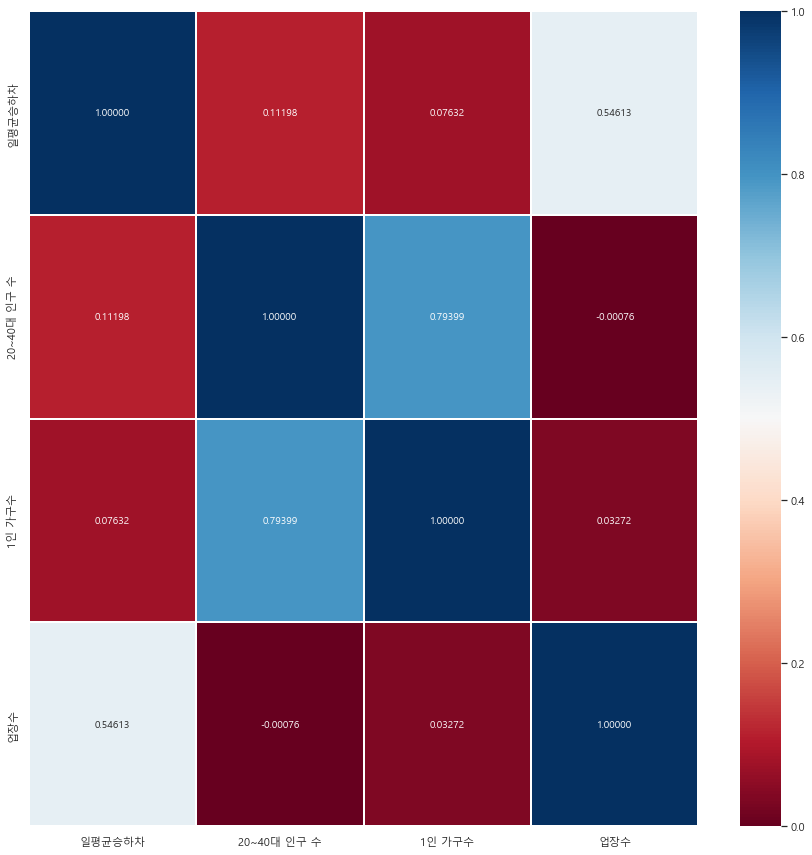

In [23]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(scaling_data.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

In [24]:
data.columns

Index(['역사명', '동별', '역위도', '역경도', '일평균승하차', '업장수', '1인 가구수', '2인 가구수', '환승',
       '총 상가 수', '공실 상가 수', '전체 상가 면적', '공실 상가 면적', '20~40대 인구 수', '일평균승하차 레벨',
       '업장수 레벨', '1인 가구수 레벨', '2인 가구수 레벨', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역',
       '여객 터미널', '주변 관광지', '주변 대학교'],
      dtype='object')

In [ ]:
#['역사명', '동별', '일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']

In [27]:
all_data_col = ['일평균승하차', '업장수', '총 상가 수',  '공실 상가 수', '업장수', '20~40대 인구 수', '1인 가구수']

In [28]:
all_data = data[all_data_col].fillna(0).to_numpy()
all_data

array([[7.76100e+03, 3.45000e+02, 2.00000e+00, 0.00000e+00, 3.45000e+02,
        8.48500e+03, 6.27700e+03],
       [6.22100e+03, 3.45000e+02, 1.00000e+00, 0.00000e+00, 3.45000e+02,
        8.48500e+03, 6.27700e+03],
       [8.32700e+03, 2.46000e+02, 1.00000e+00, 0.00000e+00, 2.46000e+02,
        5.67400e+03, 4.63300e+03],
       [5.36000e+03, 3.02000e+02, 1.00000e+00, 0.00000e+00, 3.02000e+02,
        6.89400e+03, 4.16000e+03],
       [5.49000e+03, 3.02000e+02, 1.00000e+00, 0.00000e+00, 3.02000e+02,
        6.89400e+03, 4.16000e+03],
       [6.57800e+03, 2.22000e+02, 1.00000e+00, 0.00000e+00, 2.22000e+02,
        3.79700e+03, 3.69300e+03],
       [1.13140e+04, 1.77000e+02, 6.00000e+00, 2.00000e+00, 1.77000e+02,
        5.00400e+03, 2.43300e+03],
       [2.90800e+04, 3.74000e+02, 5.00000e+00, 0.00000e+00, 3.74000e+02,
        6.51200e+03, 4.88600e+03],
       [1.09290e+04, 4.12000e+02, 2.00000e+00, 1.00000e+00, 4.12000e+02,
        6.13600e+03, 3.77500e+03],
       [7.04100e+03, 1.85000

In [29]:
scaler_2 = MinMaxScaler()

scaler_2.fit(all_data)

MinMaxScaler()

In [30]:
all_data = scaler_2.transform(all_data)

In [31]:
all_data_scaling = pd.DataFrame(all_data,columns=all_data_col)

In [32]:
all_data_scaling.head()

,일평균승하차,업장수,총 상가 수,공실 상가 수,업장수,20~40대 인구 수,1인 가구수
0,0.134213,0.002055,0.046512,0.0,0.002055,0.763278,0.765693
1,0.107581,0.002055,0.023256,0.0,0.002055,0.763278,0.765693
2,0.144001,0.001331,0.023256,0.0,0.001331,0.506753,0.550256
3,0.092692,0.001740,0.023256,0.0,0.001740,0.618087,0.488272
4,0.094940,0.001740,0.023256,0.0,0.001740,0.618087,0.488272


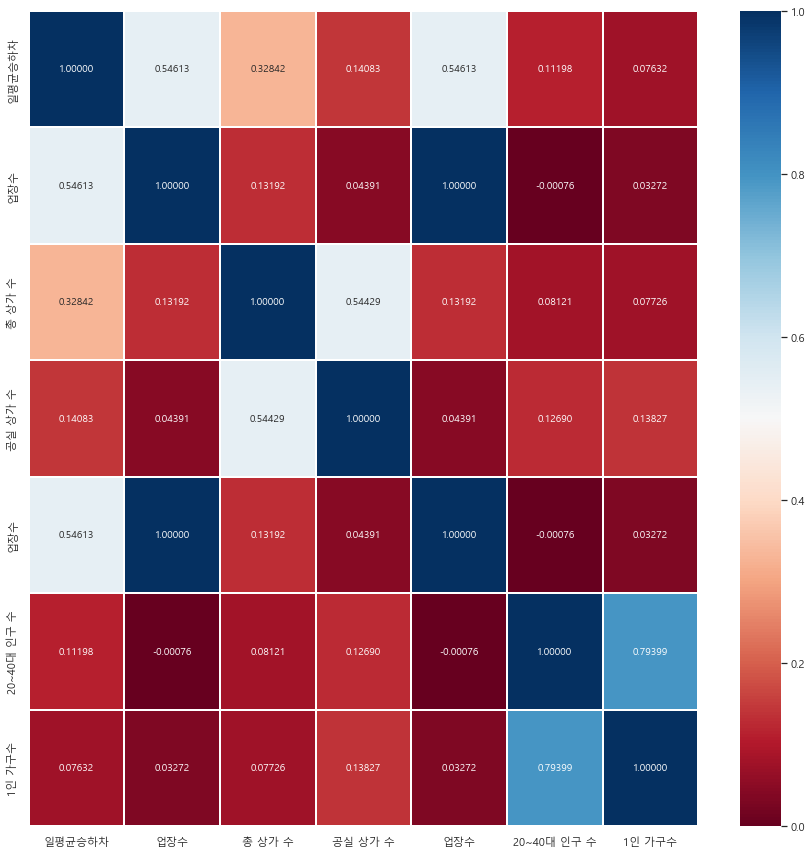

In [33]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(all_data_scaling.corr(), annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

In [37]:
scaling_data.head()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922


In [38]:
scaling_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 다대포해수욕장 to 안평
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일평균승하차  122 non-null    float64
 1   전체인구수   122 non-null    float64
 2   1인 가구수  122 non-null    float64
 3   2인 가구수  122 non-null    float64
 4   업장수     122 non-null    float64
dtypes: float64(5)
memory usage: 5.7+ KB


In [39]:
scaling_data.columns

Index(['일평균승하차', '전체인구수', '1인 가구수', '2인 가구수', '업장수'], dtype='object')

In [40]:
sum(list(scaling_data.iloc[0]))

2.9688749387927524

In [41]:
scaling_data

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922
...,...,...,...,...,...
석대,0.005983,0.430075,0.532548,0.419763,0.096833
영산대,0.082938,0.430075,0.532548,0.419763,0.096833
동부산대학,0.074707,0.661285,0.710725,0.669089,0.133374
고촌,0.017570,0.000000,0.000000,0.000000,0.000000


In [42]:
scaling_data

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110
낫개,0.144001,0.672086,0.574458,0.658086,0.149817
신장림,0.092692,0.661452,0.515809,0.670542,0.183922
장림,0.094940,0.661452,0.515809,0.670542,0.183922
...,...,...,...,...,...
석대,0.005983,0.430075,0.532548,0.419763,0.096833
영산대,0.082938,0.430075,0.532548,0.419763,0.096833
동부산대학,0.074707,0.661285,0.710725,0.669089,0.133374
고촌,0.017570,0.000000,0.000000,0.000000,0.000000


In [43]:
new_col = {'등급분류':[]}

for idx in range(len(scaling_data)):
    new_col['등급분류'].append(sum(list(scaling_data.iloc[idx])))

In [45]:
print((new_col['등급분류']))

[2.9688749387927524, 2.9422433197978366, 2.198447256422967, 2.1244167515920385, 2.1266648752734274, 1.5951744964844294, 1.473983958325461, 2.452731580236055, 2.228632502755271, 1.117871356863405, 1.8145616879508735, 1.3218215927014083, 1.2139175473535895, 1.3059176856996622, 1.3095212622441612, 0.8339254398168889, 0.8479329796778512, 1.170307118182477, 1.113832438385256, 1.3651243016940933, 1.1741208021972254, 1.1486341513317142, 2.169785701713301, 2.1733594490346353, 3.109694650336613, 2.778511445549839, 2.9147740178940365, 1.850266409395848, 1.913882501036225, 2.132940853227806, 1.8694607577690157, 2.170506061255271, 2.1820346051242154, 1.7536978707832618, 2.5600630948953396, 2.70990918488946, 2.462777035257073, 2.350678936778186, 1.6597485230984492, 2.418221472446571, 2.72852727023972, 1.0091251265512784, 1.1231395837158755, 1.834790031364959, 2.3830460247794614, 2.2961999417836476, 2.1666907244765534, 2.9112208898109384, 3.16327014101282, 2.515610583792773, 1.601963327248136, 2.137

In [46]:
scaling_data['등급분류'] = new_col['등급분류']
scaling_data.head()

,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수,등급분류
다대포해수욕장,0.134213,0.940708,0.778301,0.905543,0.210110,2.968875
다대포항,0.107581,0.940708,0.778301,0.905543,0.210110,2.942243
낫개,0.144001,0.672086,0.574458,0.658086,0.149817,2.198447
신장림,0.092692,0.661452,0.515809,0.670542,0.183922,2.124417
장림,0.094940,0.661452,0.515809,0.670542,0.183922,2.126665


In [47]:
use_data.head()

,역사명,일평균승하차,전체인구수,1인 가구수,2인 가구수,업장수
0,다대포해수욕장,7761.0,16897.0,6277.0,4362.0,345.0
1,다대포항,6221.0,16897.0,6277.0,4362.0,345.0
2,낫개,8327.0,12072.0,4633.0,3170.0,246.0
3,신장림,5360.0,11881.0,4160.0,3230.0,302.0
4,장림,5490.0,11881.0,4160.0,3230.0,302.0


In [53]:
org_data = pd.read_csv('../data/orginal_데이터_합본.csv',encoding='cp949',index_col=0)

In [54]:
org_data.head()

,역사명,동별,호선,환승,역위도,역경도,일평균승차,일평균하차,일평균승하차,순위,...,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계,1인가구수,업장 수,계,1인,2인
0,다대포해수욕장,다대1동,1.0,NaN,35.048670,128.964100,4264.0,3497.0,7761.0,69.0,...,2.0,2.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,1.0,NaN,35.057820,128.971300,2900.0,3321.0,6221.0,80.0,...,1.0,1.0,0.0,사하구,16941.0,6298.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,1.0,NaN,35.065265,128.979873,4104.0,4223.0,8327.0,64.0,...,1.0,1.0,0.0,사하구,12110.0,4651.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,1.0,NaN,35.074433,128.977041,2777.0,2583.0,5360.0,91.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,1.0,NaN,35.081090,128.977500,2854.0,2636.0,5490.0,89.0,...,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0,11881.0,4160.0,3230.0


In [50]:
org_data.columns

Index(['역사명', '동별', '호선', '환승', '역위도', '역경도', '일평균승차', '일평균하차', '일평균승하차', '순위',
       '하행 대기시간', '상행 대기시간', '상가 갯수', '사용중인 상가', '비어있는 상가', '구군별', '소계',
       '1인가구수', '업장 수', '계', '1인', '2인'],
      dtype='object')

In [ ]:
all_data_col = ['일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']

In [55]:
org_data = org_data[['역사명', '동별', '역위도', '역경도','일평균승하차', '상가 갯수', '사용중인 상가', '비어있는 상가', '업장 수', '계', '1인', '2인']]

org_data.head()

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장 수,계,1인,2인
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0


In [56]:
org_data.rename(columns={'계':'전체가구수','업장 수':'업장수','1인':'1인 가구수','2인':'2인 가구수'},inplace=True)
org_data.head()

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장수,전체가구수,1인 가구수,2인 가구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0


In [57]:
org_data.to_csv('../data/통합_사용_데이터.csv',encoding='cp949')

In [58]:
org_data.fillna(0,inplace=True)
org_data[org_data['상가 갯수'] != 0]

,역사명,동별,역위도,역경도,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,업장수,전체가구수,1인 가구수,2인 가구수
0,다대포해수욕장,다대1동,35.048670,128.964100,7761.0,2.0,2.0,0.0,345.0,16897.0,6277.0,4362.0
1,다대포항,다대1동,35.057820,128.971300,6221.0,1.0,1.0,0.0,345.0,16897.0,6277.0,4362.0
2,낫개,다대2동,35.065265,128.979873,8327.0,1.0,1.0,0.0,246.0,12072.0,4633.0,3170.0
3,신장림,장림2동,35.074433,128.977041,5360.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
4,장림,장림2동,35.081090,128.977500,5490.0,1.0,1.0,0.0,302.0,11881.0,4160.0,3230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,서동,서2동,35.213333,129.107683,4052.0,1.0,1.0,0.0,102.0,4872.0,2478.0,1309.0
108,반여농산물시장,반송1동,35.217779,129.124061,3738.0,1.0,1.0,0.0,159.0,7725.0,4295.0,2022.0
109,석대,반송1동,35.218112,129.137179,346.0,1.0,0.0,1.0,159.0,7725.0,4295.0,2022.0
110,영산대,반송1동,35.225777,129.146149,4796.0,1.0,1.0,0.0,159.0,7725.0,4295.0,2022.0
